# Сначала подгрузим данные с гуглдока #

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%ls

drive/  sample_data/


In [ ]:
% cd drive/MyDrive/

/content/drive/MyDrive


In [ ]:
%ls

 1.JPG
'8 билет.pdf.gdoc'
 bad_contrast_1/
 bad_contrast_2/
 bad_contrast_3/
 bad_contrast_4/
 bad_contrast_5/
 bright_images/
'Colab Notebooks'/
 ColortypesDone1@
 ColortypesDone2@
 ColortypesDone3@
 ColortypesDone4@
 DIHT_lectures@
 dim_images/
'ege18 (1).doc'
 ege27-C4.doc
 fiz_demo_2016.pdf
'input1 (1).dat.gdoc'
 input1.dat.gdoc
'input2 (1).dat.gdoc'
 input2.dat.gdoc
 list_of_all_images_quality_assesments.txt
 M1_9_15_3.pdf
'Nashe postchelovecheskoe buduschee_ Posledstviya biotehnologicheskoj revolyucii .fb2.gdoc'
 normal_images/
'Novy_textovy_dokument_7 (1).txt.gdoc'
 Novy_textovy_dokument_7.txt.gdoc
 Novy_textovy_dokument_8.txt.gdoc
 output1.dat.gdoc
'output2 (1).dat.gdoc'
'output2 (2).dat.gdoc'
 output2.dat.gdoc
 output3.dat.gdoc
 passed_images_brightness.txt
 passed_images_names.txt
'Proga_zachet (1).gdoc'
'Proga_zachet (2).gdoc'
 Proga_zachet.gdoc
'Python siftDown или запихиваем эелементы в самое начало кучи(даже не говнокод).txt.gdoc'
'Python Обход в ширину.txt.gdoc'
 Referat

In [ ]:
import glob

In [ ]:
list_of_all_imges = glob.glob('ColortypesDone[1-4]/*/*.jpg')

# Теперь пройдемся по всем данным, составляя лист из изображений, проходящих is_low_contrast, и лист из яркостей этих изображений соотвественно #

In [ ]:
from skimage.exposure import is_low_contrast
from skimage.io import imread
from PIL import ImageStat, Image

In [ ]:
def brightness(image):
   im = Image.open(image).convert('L')
   stat = ImageStat.Stat(im)
   return stat.mean[0]

In [ ]:
passed_images_names = []
passed_images_brightness = []

In [ ]:
for image_name in list_of_all_imges:
  if not is_low_contrast(imread(image_name)):
    passed_images_names.append(image_name)
    passed_images_brightness.append(brightness(image_name))

две ячейки для сохранения\выгрузки наших данных

In [ ]:
import torch

In [ ]:
#torch.save(passed_images_names, 'passed_images_names.txt')
#torch.save(passed_images_brightness, 'passed_images_brightness.txt')

In [ ]:
passed_images_names = torch.load('passed_images_names.txt')
passed_images_brightness = torch.load('passed_images_brightness.txt')

#  Сделаем гистограмму по яркости #

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Преобразуем данные, оставив только два знака после запятой

In [ ]:
max(passed_images_brightness)

244.91566529492457

In [ ]:
min(passed_images_brightness)

3.8201941015089163

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 8 Text major ticklabel objects>)

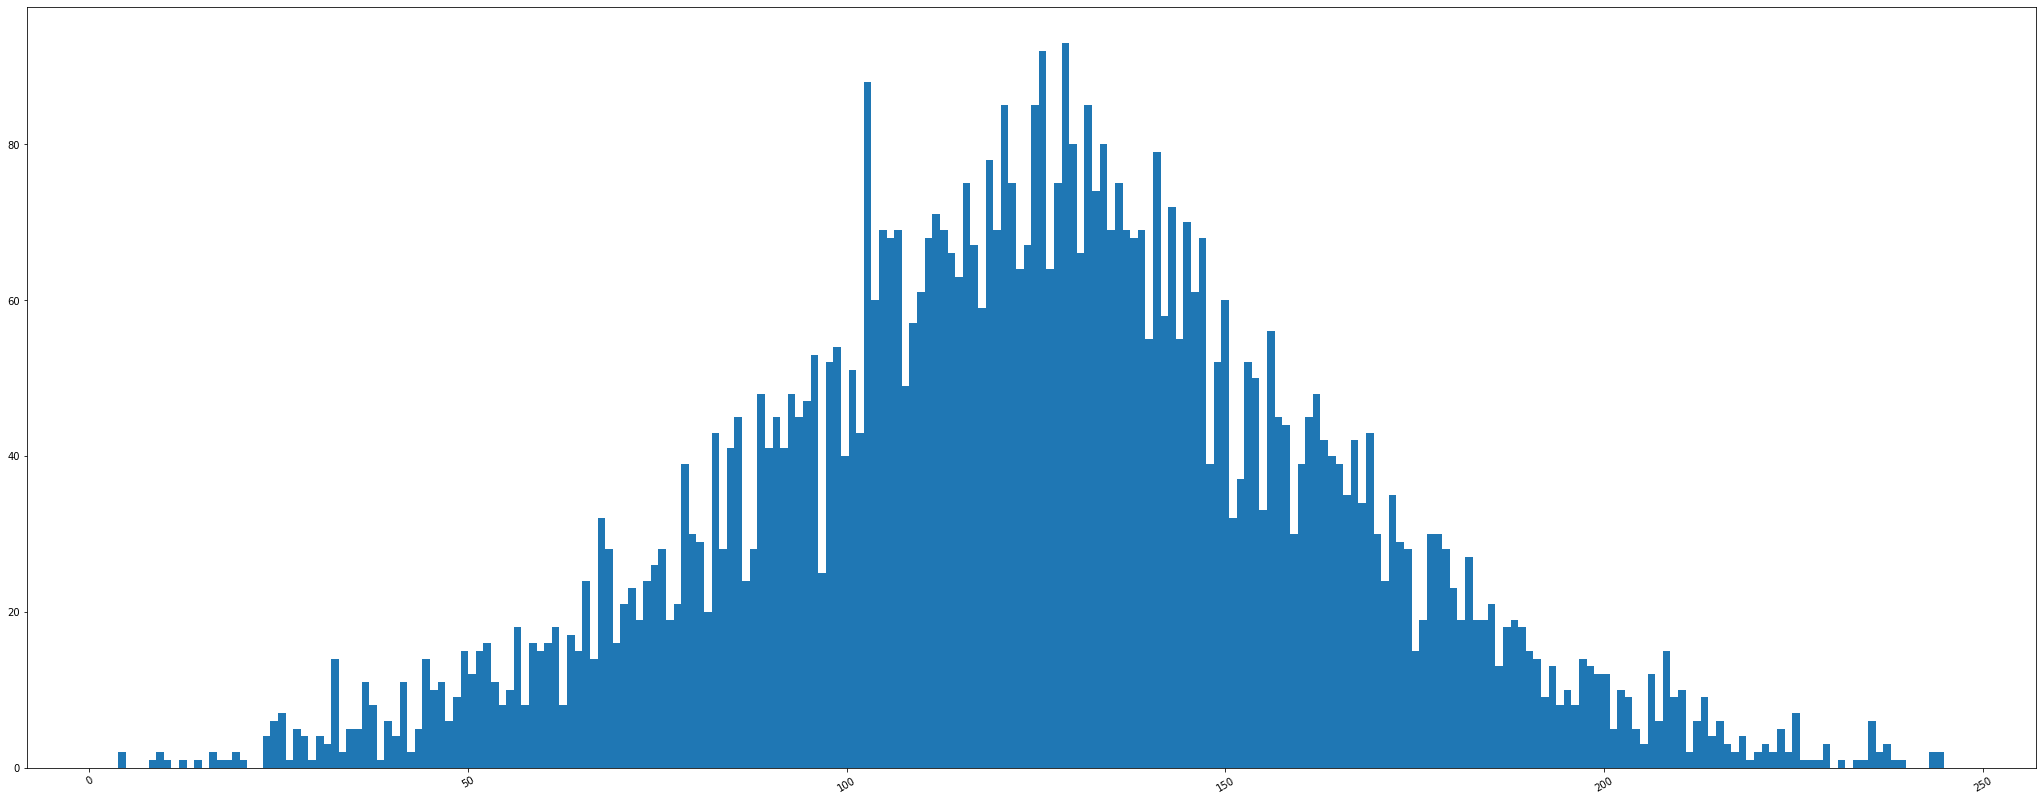

In [ ]:
plt.figure(figsize=(36, 14))
counts, edges, plot = plt.hist(np.sort(passed_images_brightness), bins=240)
plt.xticks(rotation=30)

# Проведем линию по 10% всех самых ярких и самых тусклых картинок #

In [ ]:
stopping_value = 650
current_count = 0
i = 0

while current_count < stopping_value:
  current_count += counts[i]
  i += 1

print(i)
print(edges[i])

73
77.15339992283951


In [ ]:
left_border = edges[i]

In [ ]:
current_count = 0
i = len(counts) - 1

while current_count < stopping_value:
  current_count += counts[i]
  i -= 1

print(i)
print(edges[i])

167
171.58245947359399


In [ ]:
right_border = edges[i]

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 8 Text major ticklabel objects>)

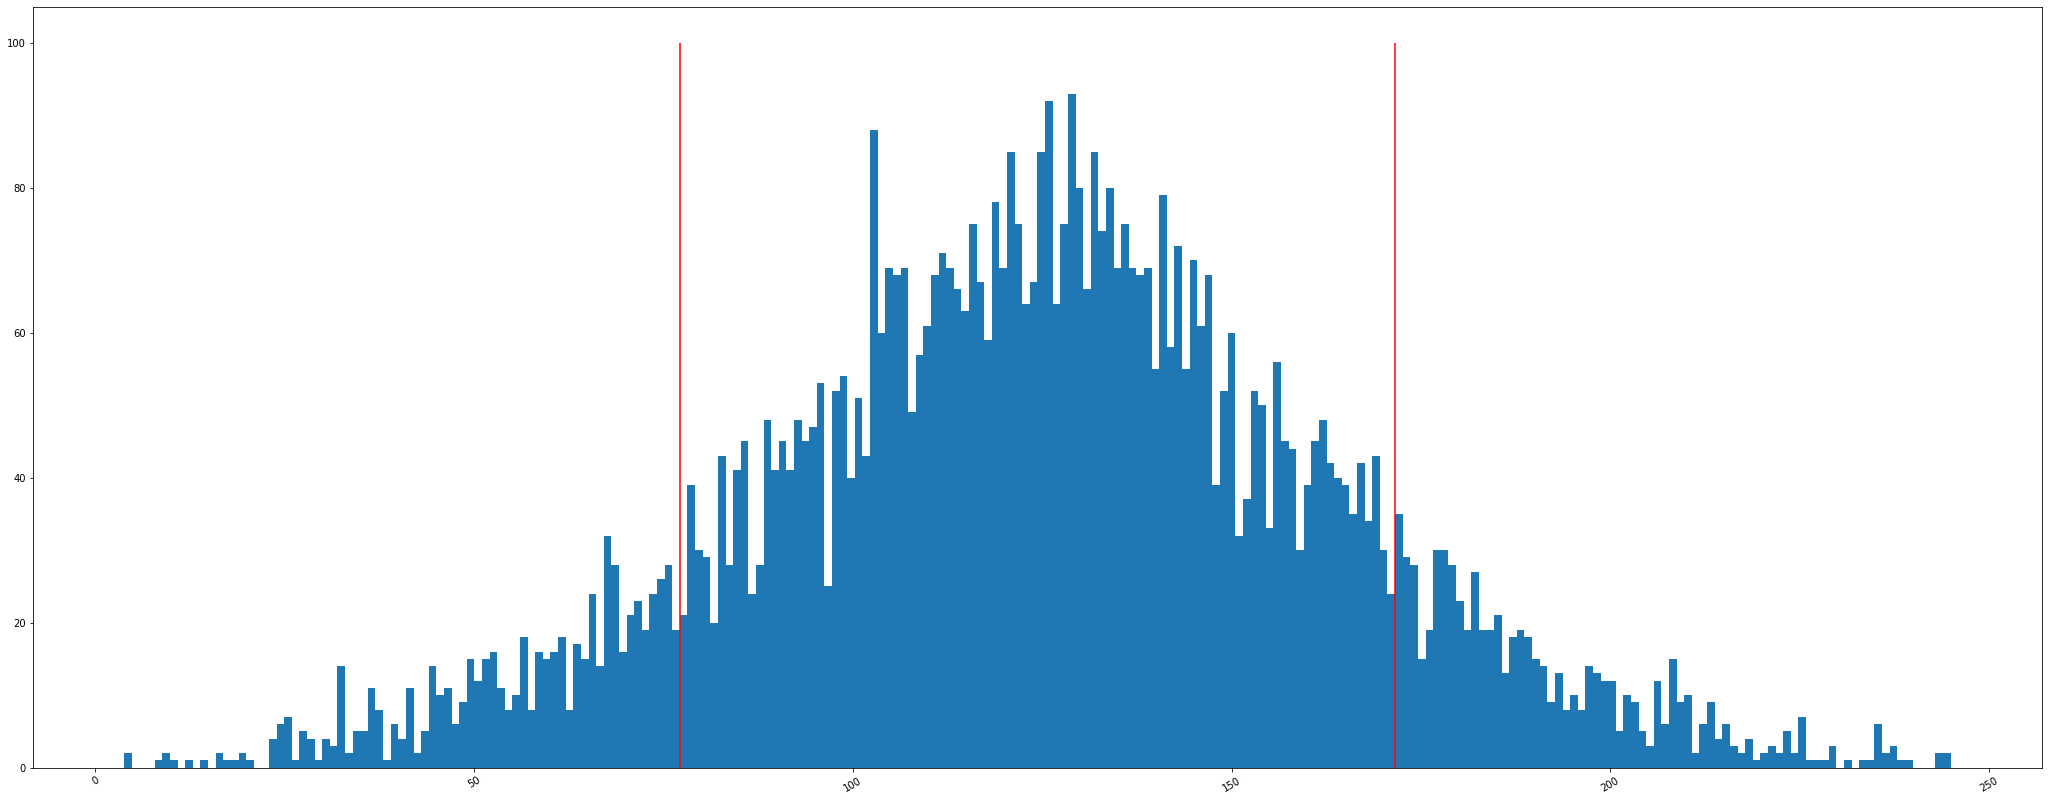

In [ ]:
plt.figure(figsize=(36, 14))
counts, edges, plot = plt.hist(np.sort(passed_images_brightness), bins=240)
plt.vlines(left_border, 0, 100, color='red', label='left_border')
plt.vlines(right_border, 0, 100, color='red', label='right_border')
plt.xticks(rotation=30)

Получились следующие границы:
граница слева равна 77, а граница справа равна 171

Замечаем странность....

In [ ]:
print(len(passed_images_brightness))
print(len(list_of_all_imges))

6503
6503


Т.е. через is_low_contrast у нас прошли воообще все изображения. Эт странно, поэтому я сделаю три выборки по яркости (первые и последние 10% изображений по яркости и все остальные)

In [ ]:
dim_images = []
normal_images = []
bright_images = []

In [ ]:
names_and_brightness = list(zip(passed_images_names, passed_images_brightness))

In [ ]:
for image in names_and_brightness:
  if image[1] < left_border:
    dim_images.append(image)
  elif image[1] > right_border:
    bright_images.append(image)
  else:
    normal_images.append(image)

In [ ]:
bright_images

[('ColortypesDone3/spring/00007345.jpg', 178.60181932517997),
 ('ColortypesDone3/spring/00008851.jpg', 194.375268175583),
 ('ColortypesDone3/spring/00010441.jpg', 201.97017272168705),
 ('ColortypesDone3/spring/00009412.jpg', 180.62398907574584),
 ('ColortypesDone3/mixed/00007147.jpg', 188.28871033836788),
 ('ColortypesDone3/mixed/00007988.jpg', 244.91566529492457),
 ('ColortypesDone3/mixed/00011520.jpg', 177.59380658436214),
 ('ColortypesDone3/mixed/00011949.jpg', 197.65659396433472),
 ('ColortypesDone3/mixed/00013409.jpg', 199.6215048010974),
 ('ColortypesDone3/mixed/00010128.jpg', 215.0576774691358),
 ('ColortypesDone3/mixed/00013368.jpg', 195.75079149296116),
 ('ColortypesDone3/mixed/00007305.jpg', 203.58274537037036),
 ('ColortypesDone3/mixed/00007717.jpg', 206.00800685871056),
 ('ColortypesDone3/mixed/00007313.jpg', 203.58274537037036),
 ('ColortypesDone3/mixed/00013016.jpg', 176.21512278363423),
 ('ColortypesDone3/mixed/00010133.jpg', 215.0576774691358),
 ('ColortypesDone3/mixed/

In [ ]:
import shutil
import os

In [ ]:
list_of_names_for_subdirs = ['dim_images', 'normal_images', 'bright_images']
index_of_subdir_name = 0

for group in [dim_images, normal_images, bright_images]:
  for element in group:
    new_name = shutil.copy(element[0], list_of_names_for_subdirs[index_of_subdir_name])
    os.rename(new_name,  list_of_names_for_subdirs[index_of_subdir_name] + '/' + str(element[1]) + '.jpg')
  index_of_subdir_name += 1

bright_images почему-то не заполнились, заполню их еще раз

In [ ]:
for element in bright_images:
  new_name = shutil.copy(element[0], 'bright_images')
  os.rename(new_name, 'bright_images' + '/' + str(element[1]) + '.jpg')

Предварительно заметно, что в "яркие" попали те картинки, где большой баланс белого(белые стены, или рисунки без фона) и абсолютно так же в "тусклых" картинках оказались фотографии с большим балансом черного(стилизированные студийные фотки)

А теперь хочу попробовать другие параметры для is_low_contrast

In [ ]:
from skimage.exposure import is_low_contrast
from skimage.io import imread
from PIL import ImageStat, Image

In [ ]:
def brightness(image):
   im = Image.open(image).convert('L')
   stat = ImageStat.Stat(im)
   return stat.mean[0]

In [ ]:
passed_images_names = []
passed_images_brightness = []

In [ ]:
for image_name in list_of_all_imges:
  if not is_low_contrast(imread(image_name), fraction_threshold=0.1):
    passed_images_names.append(image_name)
    passed_images_brightness.append(brightness(image_name))

In [ ]:
print(len(passed_images_names))
print(len(list_of_all_imges))

6501
6503


In [ ]:
save_first_trechold_change = []

In [ ]:
for image in list_of_all_imges:
  if image not in passed_images_names:
    print(image)
    save_first_trechold_change.append(image)

ColortypesDone4/непонятно/00000477.jpg
ColortypesDone4/непонятно/00002385.jpg


Возьмем трешхолд в два раза больше

In [ ]:
passed_images_names = []
passed_images_brightness = []

In [ ]:
for image_name in list_of_all_imges:
  if not is_low_contrast(imread(image_name), fraction_threshold=0.2):
    passed_images_names.append(image_name)
    passed_images_brightness.append(brightness(image_name))

In [ ]:
print(len(passed_images_names))
print(len(list_of_all_imges))

6472
6503


In [ ]:
save_second_trechold_change = []

In [ ]:
for image in list_of_all_imges:
  if image not in passed_images_names:
    print(image)
    save_second_trechold_change.append(image)

ColortypesDone3/mixed/00008760.jpg
ColortypesDone3/mixed/00005064.jpg
ColortypesDone3/mixed/00005705.jpg
ColortypesDone3/sumer/00009585.jpg
ColortypesDone3/winter/00010795.jpg
ColortypesDone4/лето/00009585.jpg
ColortypesDone4/осень/00004546.jpg
ColortypesDone4/непонятно/00006706.jpg
ColortypesDone4/непонятно/00004844.jpg
ColortypesDone4/непонятно/00001732.jpg
ColortypesDone4/непонятно/00000477.jpg
ColortypesDone4/непонятно/00008760.jpg
ColortypesDone4/непонятно/00007321.jpg
ColortypesDone4/непонятно/00010338.jpg
ColortypesDone4/непонятно/00001358.jpg
ColortypesDone4/непонятно/00006807.jpg
ColortypesDone4/непонятно/00005705.jpg
ColortypesDone4/непонятно/00005064.jpg
ColortypesDone4/непонятно/00002078.jpg
ColortypesDone4/непонятно/00005994.jpg
ColortypesDone4/непонятно/00007629.jpg
ColortypesDone4/непонятно/00008494.jpg
ColortypesDone4/непонятно/00002385.jpg
ColortypesDone4/афроамериканский цветотип/00003745.jpg
ColortypesDone4/афроамериканский цветотип/00006403.jpg
ColortypesDone4/зим

In [ ]:
name_for_subdir = 'bad_contrast_1'
list_of_name_to_search = save_second_trechold_change

for element in list_of_name_to_search:
  new_name = shutil.copy(element, name_for_subdir)


И еще сильнее повысим параметр контраста

In [ ]:
passed_images_names = []
passed_images_brightness = []

In [ ]:
for image_name in list_of_all_imges:
  if not is_low_contrast(imread(image_name), fraction_threshold=0.4):
    passed_images_names.append(image_name)
    passed_images_brightness.append(brightness(image_name))

In [ ]:
print(len(passed_images_names))
print(len(list_of_all_imges))

4822
6503


In [ ]:
save_third_trechold_change = []

In [ ]:
for image in list_of_all_imges:
  if image not in passed_images_names:
    save_third_trechold_change.append(image)

ColortypesDone3/spring/00009974.jpg
ColortypesDone3/spring/00003322.jpg
ColortypesDone3/spring/00000359.jpg
ColortypesDone3/spring/00007345.jpg
ColortypesDone3/spring/00004313.jpg
ColortypesDone3/spring/00008851.jpg
ColortypesDone3/spring/00005916.jpg
ColortypesDone3/spring/00008599.jpg
ColortypesDone3/spring/00005521.jpg
ColortypesDone3/spring/00005911.jpg
ColortypesDone3/spring/00010874.jpg
ColortypesDone3/spring/00005510.jpg
ColortypesDone3/spring/00003560.jpg
ColortypesDone3/spring/00002355.jpg
ColortypesDone3/spring/00001329.jpg
ColortypesDone3/mixed/00009806.jpg
ColortypesDone3/mixed/00013322.jpg
ColortypesDone3/mixed/00010880.jpg
ColortypesDone3/mixed/00010664.jpg
ColortypesDone3/mixed/00007079.jpg
ColortypesDone3/mixed/00006602.jpg
ColortypesDone3/mixed/00007722.jpg
ColortypesDone3/mixed/00011949.jpg
ColortypesDone3/mixed/00013409.jpg
ColortypesDone3/mixed/00012071.jpg
ColortypesDone3/mixed/00010128.jpg
ColortypesDone3/mixed/00006439.jpg
ColortypesDone3/mixed/00013368.jpg
Color

In [ ]:
name_for_subdir = 'bad_contrast_2'
list_of_name_to_search = save_third_trechold_change

for element in list_of_name_to_search:
  new_name = shutil.copy(element, name_for_subdir)


Таааак, теперь в откинутые фотки, попали вполне нормальные. Значит иедальный параметр где-то между 0.2 и 0.4. Попробуем найти нужный параметр бинарной сортировокой

In [ ]:
curr_treshhold_param = 0.3

In [ ]:
passed_images_names = []
passed_images_brightness = []

In [ ]:
for image_name in list_of_all_imges:
  if not is_low_contrast(imread(image_name), fraction_threshold=curr_treshhold_param):
    passed_images_names.append(image_name)
    passed_images_brightness.append(brightness(image_name))

In [ ]:
print(len(passed_images_names))
print(len(list_of_all_imges))

6303
6503


In [ ]:
save_fourth_trechold_change = []

In [ ]:
for image in list_of_all_imges:
  if image not in passed_images_names:
    save_fourth_trechold_change.append(image)

In [ ]:
name_for_subdir = 'bad_contrast_3'
list_of_name_to_search = save_fourth_trechold_change

for element in list_of_name_to_search:
  new_name = shutil.copy(element, name_for_subdir)


Большое количество фоток оказались нормальными. Уменьшим трешхолд

In [ ]:
curr_treshhold_param = 0.25

In [ ]:
passed_images_names = []
passed_images_brightness = []

In [ ]:
for image_name in list_of_all_imges:
  if not is_low_contrast(imread(image_name), fraction_threshold=curr_treshhold_param):
    passed_images_names.append(image_name)
    passed_images_brightness.append(brightness(image_name))

In [ ]:
print(len(passed_images_names))
print(len(list_of_all_imges))

6435
6503


In [ ]:
save_fifth_trechold_change = []

In [ ]:
for image in list_of_all_imges:
  if image not in passed_images_names:
    save_fifth_trechold_change.append(image)

In [ ]:
name_for_subdir = 'bad_contrast_4'
list_of_name_to_search = save_fifth_trechold_change

for element in list_of_name_to_search:
  new_name = shutil.copy(element, name_for_subdir)


Уже сильно лучше, попробуем еще сильнее уменьшить, чтобы попытаться улучшить результат

In [ ]:
curr_treshhold_param = 0.225

In [ ]:
passed_images_names = []
passed_images_brightness = []

In [ ]:
for image_name in list_of_all_imges:
  if not is_low_contrast(imread(image_name), fraction_threshold=curr_treshhold_param):
    passed_images_names.append(image_name)
    passed_images_brightness.append(brightness(image_name))

In [ ]:
print(len(passed_images_names))
print(len(list_of_all_imges))

6459
6503


In [ ]:
ss = []

In [ ]:
for image in list_of_all_imges:
  if image not in passed_images_names:
    ss.append(image)

In [ ]:
name_for_subdir = 'bad_contrast_5'
list_of_name_to_search = ss

for element in list_of_name_to_search:
  new_name = shutil.copy(element, name_for_subdir)


Прям идеальный параметр

Заново построим диаграмму данных, отобранных is_low_contrast

In [ ]:
max(passed_images_brightness)

244.91566529492457

In [ ]:
min(passed_images_brightness)

3.8201941015089163

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 8 Text major ticklabel objects>)

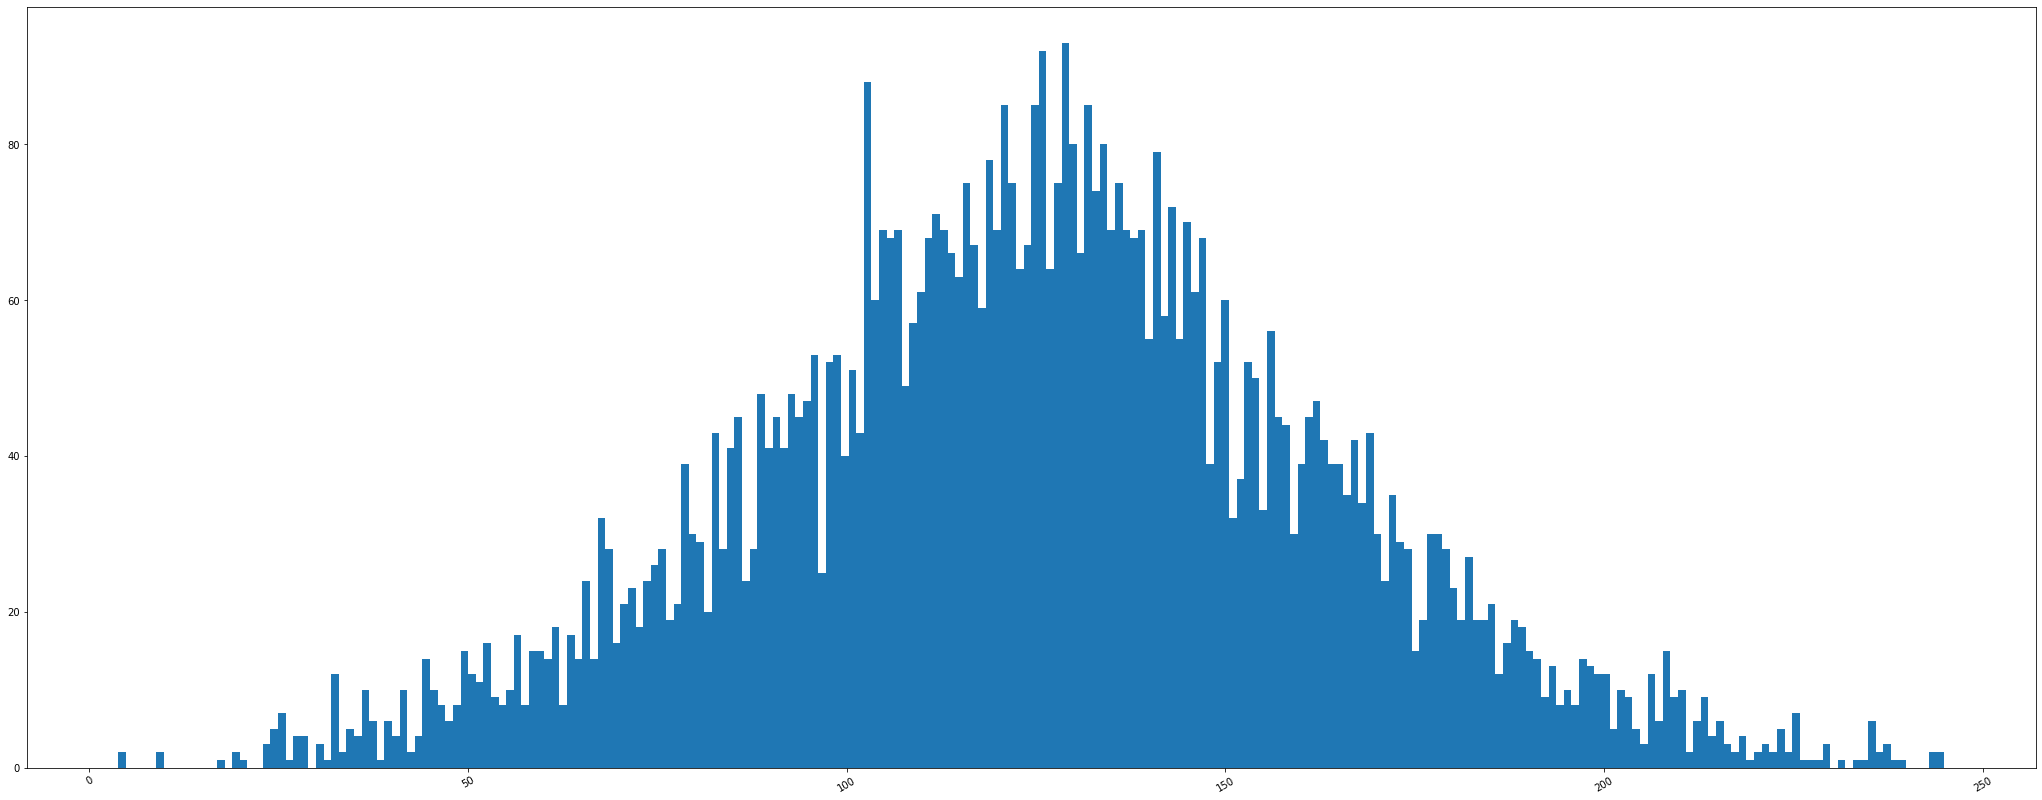

In [ ]:
plt.figure(figsize=(36, 14))
counts, edges, plot = plt.hist(np.sort(passed_images_brightness), bins=240)
plt.xticks(rotation=30)

# Проведем линию по 10% всех самых ярких и самых тусклых картинок #

In [ ]:
stopping_value = 650
current_count = 0
i = 0

while current_count < stopping_value:
  current_count += counts[i]
  i += 1

print(i)
print(edges[i])

75
79.1625288494513


In [ ]:
left_border = edges[i]

In [ ]:
current_count = 0
i = len(counts) - 1

while current_count < stopping_value:
  current_count += counts[i]
  i -= 1

print(i)
print(edges[i])

167
171.58245947359399


In [ ]:
right_border = edges[i]

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 8 Text major ticklabel objects>)

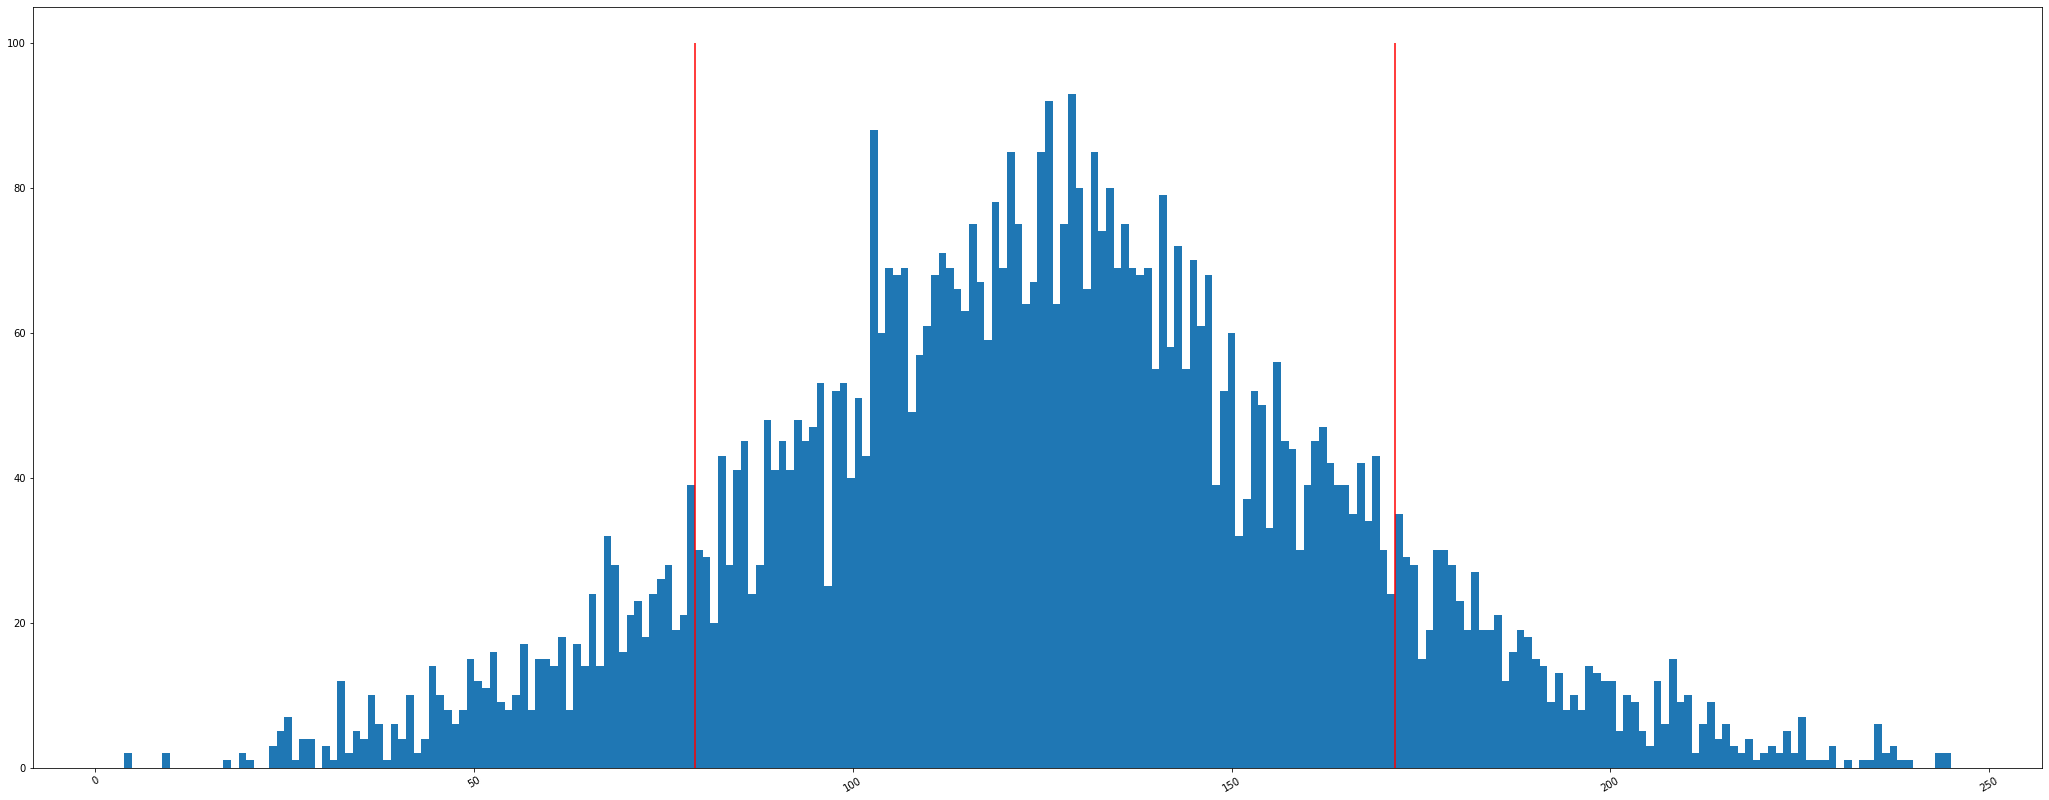

In [ ]:
plt.figure(figsize=(36, 14))
counts, edges, plot = plt.hist(np.sort(passed_images_brightness), bins=240)
plt.vlines(left_border, 0, 100, color='red', label='left_border')
plt.vlines(right_border, 0, 100, color='red', label='right_border')
plt.xticks(rotation=30)

Получились новые границы:
граница слева равна 75, а граница справа равна 167